## Author: Rajesh Kumar Singh


# Project: – Unsupervised Learning Project

### Data Description:
The data contains features extracted from the silhouette of vehicles in different angles. Four “Corgie” model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

### Domain: Object recognition

### Context:
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles

### Attribute Information:
1. All the features are geometric features extracted from the silhouette.
2. All are numeric in nature.

### Learning Outcomes:
1. Exploratory Data Analysis
2. Reduce number dimensions in the dataset with minimal information loss
3. Train a model using Principle Component

### Objective:
Apply dimensionality reduction technique –PCA and train a model using principle components instead of training the model using just the raw data.

### Data Dictionary
1. compactness
2. circularity
3. distance_circularity
4. radius_ratio
5. pr.axis_aspect_ratio
6. max.length_aspect_ratio
7. scatter_ratio
8. elongatedness
9. pr.axis_rectangularity
10. max.length_rectangularity
11. scaled_variance
12. scaled_variance.1
13. scaled_radius_of_gyration
14. scaled_radius_of_gyration.1
15. skewness_about
16. skewness_about.1
17. skewness_about.2
18. hollows_ratio
19. class

### Steps and tasks:
1. Data pre-processing –Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (10 marks)
2. Understanding the attributes -Find the relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points)
3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (5 marks)
4. Train a support vector machine using the train set and get the accuracy on the test set (10 marks)
5. Perform K-fold cross-validation and get the cross-validation score of the model (optional)
6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data –(10 points)
7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state) (20 marks)
8. Compare the accuracy scores and cross-validation scores of Support vector machines –one trained using raw data and the other using Principal Components, and mention your findings (5 points)

#### Dataset - vehicle-1.csv

#### 1. Import the Libraries

In [129]:
import numpy as np                                    #For numerical libraries
import pandas as pd                                   #To handle data in the form of rows and columns
import seaborn as sns                                 #importing seaborn for statistical plots
import matplotlib.pyplot as plt                       #importing ploting libraries

#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

#To enable plotting graphs in Jupyter notebook
%matplotlib inline                                  
from sklearn.preprocessing import LabelEncoder        #importing the Encoding library
from sklearn.model_selection import cross_val_score   #Build the model with the best hyper parameters
from scipy.stats import zscore                        #importing the zscore for scaling
from sklearn.decomposition import PCA                 #Importing PCA for dimensionality reduction and visualization
from sklearn.linear_model import LogisticRegression   #Import Logistic Regression machine learning library
from sklearn.svm import SVC                           # Import Support Vector Classifier machine learning library
from sklearn.naive_bayes import GaussianNB            #Import Naive Bayes' machine learning Library
from sklearn.model_selection import train_test_split  #Import Sklearn package's data splitting function
#from sklearn.model_selection import GridSearchCV      #Grid search to tune model parameters for SVC
from sklearn import metrics                           # Import the metrics

### 2. Load the dataset

In [130]:
#Reading the CSV file into pandas dataframe
ds_location = r'C:\Users\eyacdel\Documents\Total DataScience\Unsupervised\vehicle-1.csv'
df = pd.read_csv(ds_location)

In [131]:
#Check top 10 records of the dataset
df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [6]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

- In dataset, it shows that there are 18 independent varibales and one dependent variable i.e. Class.
- Only the class variavle is non-numeric others are numeric variables

## 3. Data Preprocessing

### Understanding of data

#### Data types and data description

In [132]:
#Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

- It gives the information about the number of rows, number of columns, data types , memory usage, number of null values in each columns.

In [8]:
#Analyze the distribution of the dataset
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

- It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) of the columns of the dataset.
- By analysing it, we can see that

  -compactness, circularity, distance_circularity, elongatedness, pr.axis_rectangularity, max.length_rectangularity,   scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about.2, hollows_ratio are approximately normally distributed.
  
  -radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, scaled_variance, scaled_variance.1, skewness_about, skewness_about.1 are approx. right skewed distribution.

In [12]:
#shows data types of columns
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [133]:
#changing the class attribute to a category instead of object
df['class']=df['class'].astype('category')

In [134]:
#Checking the datatypes after the change

df.dtypes

compactness                       int64
circularity                     float64
distance_circularity            float64
radius_ratio                    float64
pr.axis_aspect_ratio            float64
max.length_aspect_ratio           int64
scatter_ratio                   float64
elongatedness                   float64
pr.axis_rectangularity          float64
max.length_rectangularity         int64
scaled_variance                 float64
scaled_variance.1               float64
scaled_radius_of_gyration       float64
scaled_radius_of_gyration.1     float64
skewness_about                  float64
skewness_about.1                float64
skewness_about.2                float64
hollows_ratio                     int64
class                          category
dtype: object

In [135]:
#To get the shape 
df.shape

(846, 19)

- It shows the shape of the dataset i.e. there are 846 rows and 19 columns.

In [136]:
#To get the number of columns
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [137]:
#Checking for Missing Values in the dataset
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [138]:
#replace missing variable('?') into null variable using numpy
df = df.replace(' ', np.nan)

In [139]:
#Handling the Missing values
#Replacing the missing values by median 
for i in df.columns[:17]:
    median_value = df[i].median()
    df[i] = df[i].fillna(median_value)

- As some data are rightly skewed so we will use median to handle the missing values.

In [140]:
# again check for missing values
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [19]:
# Again check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

- Now, as it shows there are no misisng values present in the features.

#### Checks and balances on the given date

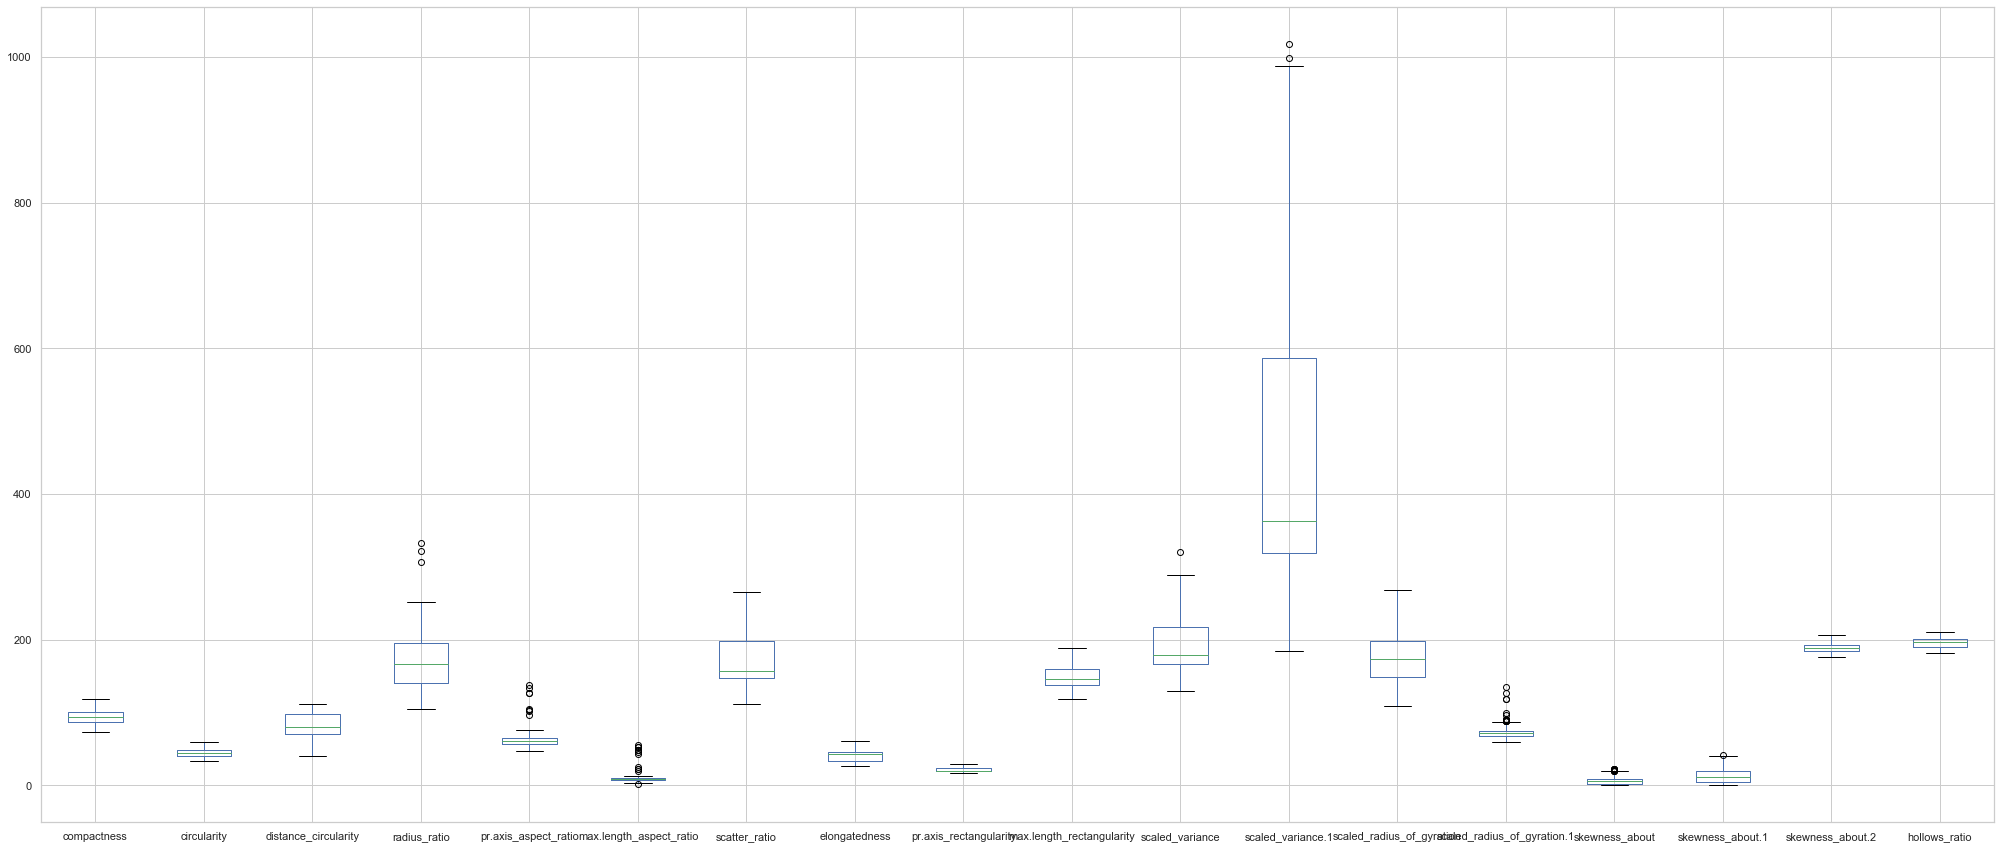

In [108]:
# Understand the outliers in dataset using boxplot
df.boxplot(figsize=(35,15))

From the above graph it is showing that some columns such as radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, skewness_about, skewness_about.1 seem to have outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BEA6A183C8>,
      dtype=object)

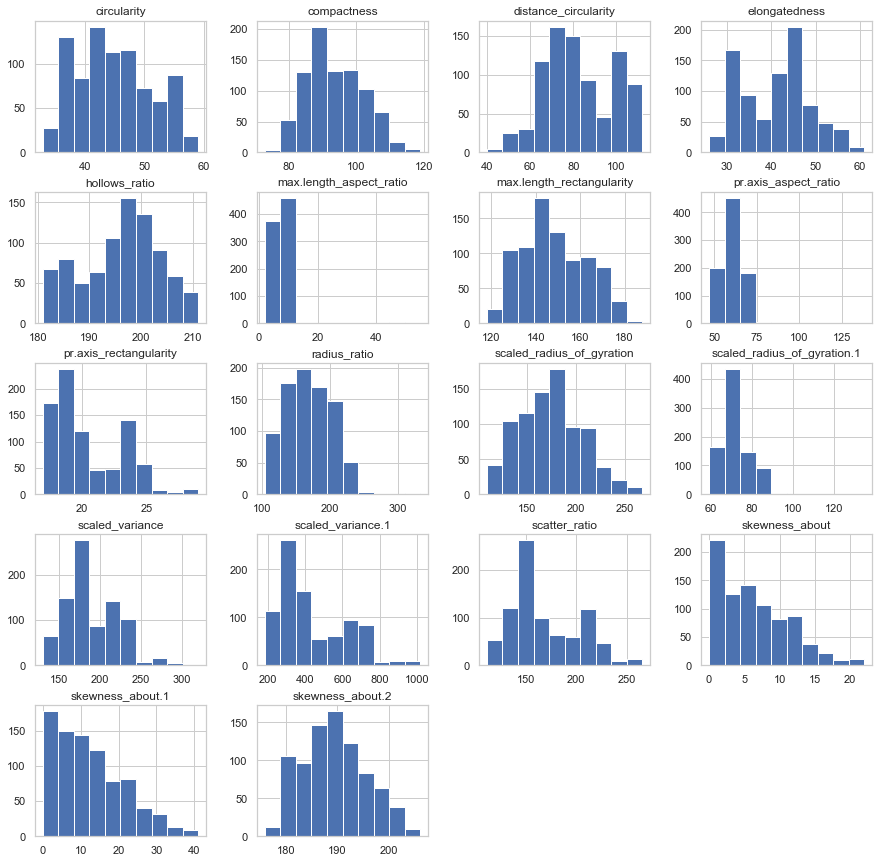

In [109]:
# Histogram 
df.hist(figsize=(15,15))

### Handling the outlier values in the dataset

In [110]:
for col_name in df.columns[:-1]:
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()

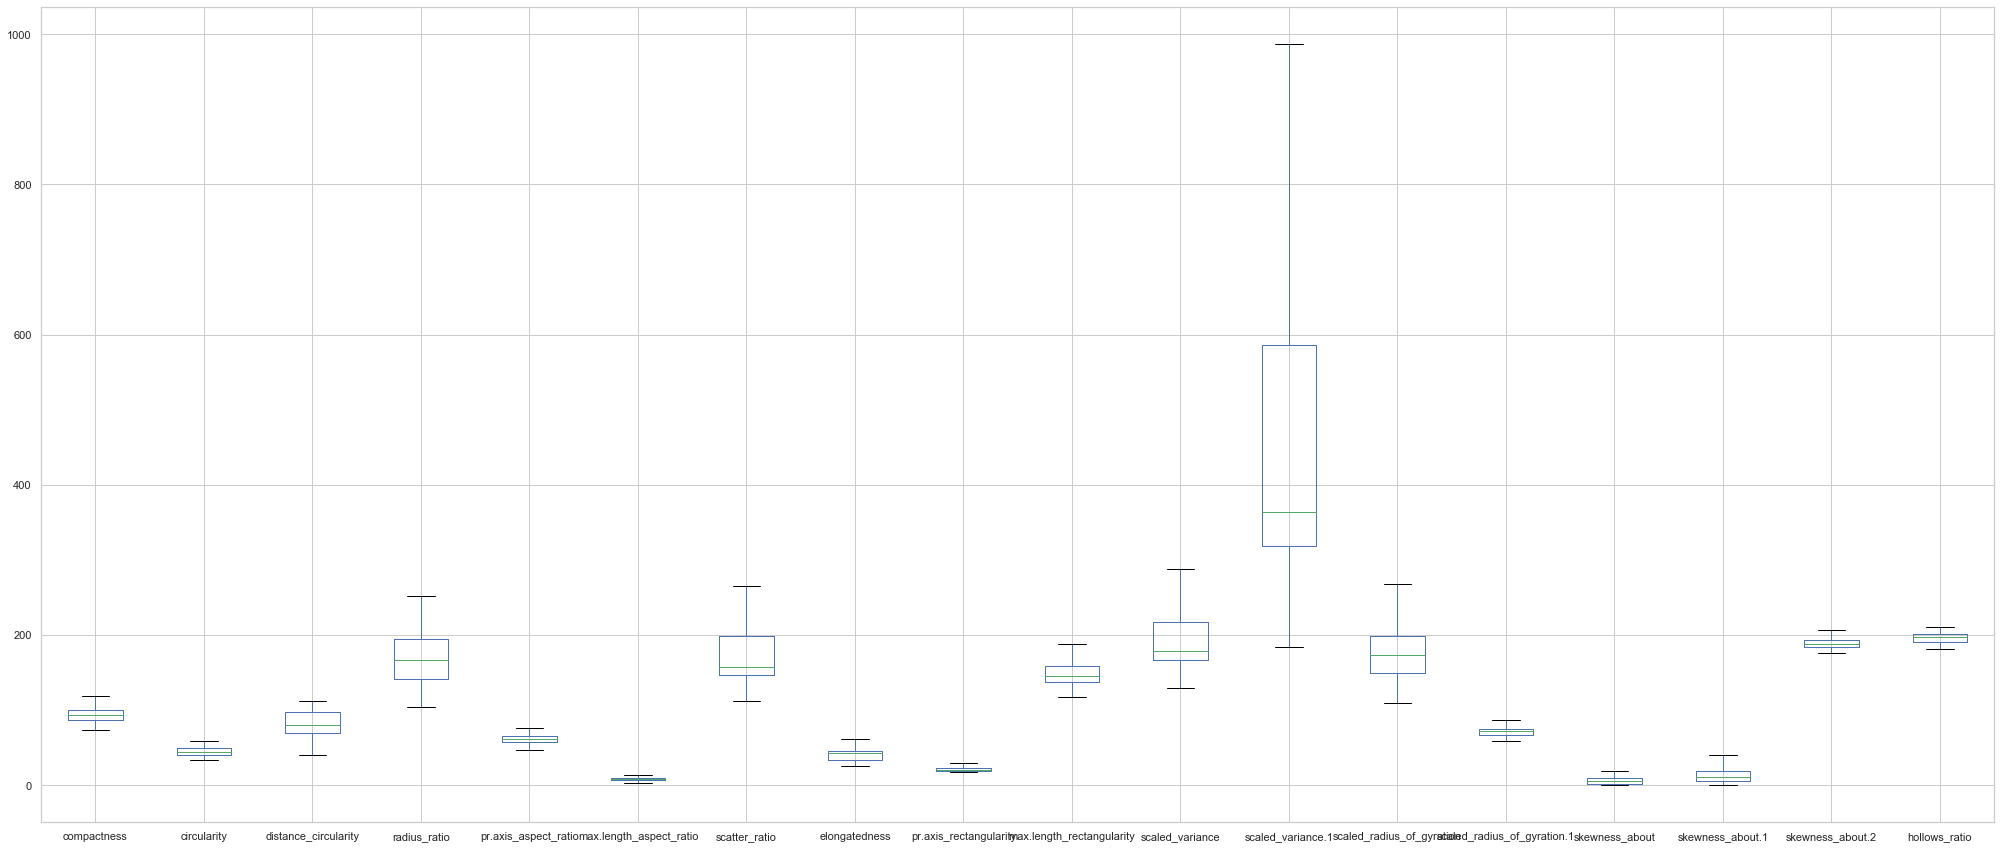

In [111]:
# again check for outliers in dataset using boxplot
df.boxplot(figsize=(35,15))

- From above graph, we have managed to handle the outliers present in the dataset.

## 4. Understanding the attributes

### Dependent Attribute

#### Class

In [112]:
print('Class: \n', df['class'].unique())

Class: 
 [van, car, bus]
Categories (3, object): [van, car, bus]


In [113]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

### Univariate Analysis

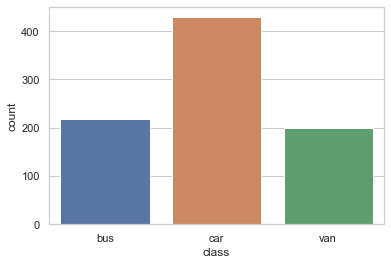

In [114]:
sns.countplot(df['class'])

#### Encode the dependent attribute

In [115]:
#Encoding of categorical variables
labelencoder_X=LabelEncoder()
df['class']=labelencoder_X.fit_transform(df['class'])

### Independent Attributes Analysis

#### Multivariate Analysis

In [116]:
#correlation matrix
cor=df.corr()
cor

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.721925     0.638280              0.794222   
pr.axis_aspect_ratio            0.192864     0.203253              0.244332   
max.length_aspect_ratio         0.499928     0.560470              0.666809   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.769871     0.802768              0.869584   
scaled_variance.1               0.806170     0.827462              0.883943   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.246681     0.068745             -0.229353   
skewness_about                  0.197308     0.136351              0.099107   
skewness_about.1                0.156348    -0.009666              0.262345   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.033796    -0.158910             -0.064467   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721925              0.192864   
circularity                      0.638280              0.203253   
distance_circularity             0.794222              0.244332   
radius_ratio                     1.000000              0.650554   
pr.axis_aspect_ratio             0.650554              1.000000   
max.length_aspect_ratio          0.463958              0.150295   
scatter_ratio                    0.769941              0.194195   
elongatedness                   -0.825392             -0.298144   
pr.axis_rectangularity           0.744139              0.163047   
max.length_rectangularity        0.579468              0.147592   
scaled_variance                  0.786183              0.207101   
scaled_variance.1                0.760257              0.196401   
scaled_radius_of_gyration        0.550774              0.148591   
scaled_radius_of_gyration.1     -0.390459             -0.321070   
skewness_about                   0.035755             -0.056030   
skewness_about.1                 0.179601             -0.021088   
skewness_about.2                 0.405849              0.400882   
hollows_ratio                    0.491758              0.415734   
class                           -0.213948             -0.209298   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.499928       0.812620   
circularity                                 0.560470       0.847938   
distance_circularity                        0.666809       0.905076   
radius_ratio                                0.463958       0.769941   
pr.axis_aspect_ratio                        0.150295       0.194195   
max.length_aspect_ratio                     1.000000       0.490759   
scatter_ratio                               0.490759       1.000000   
elongatedness                              -0.504181      -0.971601   
pr.axis_rectangularity                      0.487931       0.989751   
max.length_rectangularity                   0.642713       0.809083   
scaled_variance                             0.401391       0.960883   
scaled_variance.1                           0.463249       0.980447   
scaled_radius_of_gyration                   0.397397       0.799875   
scaled_radius_of_gyration.1                -0.335444       0.011314   
skewness_about                            

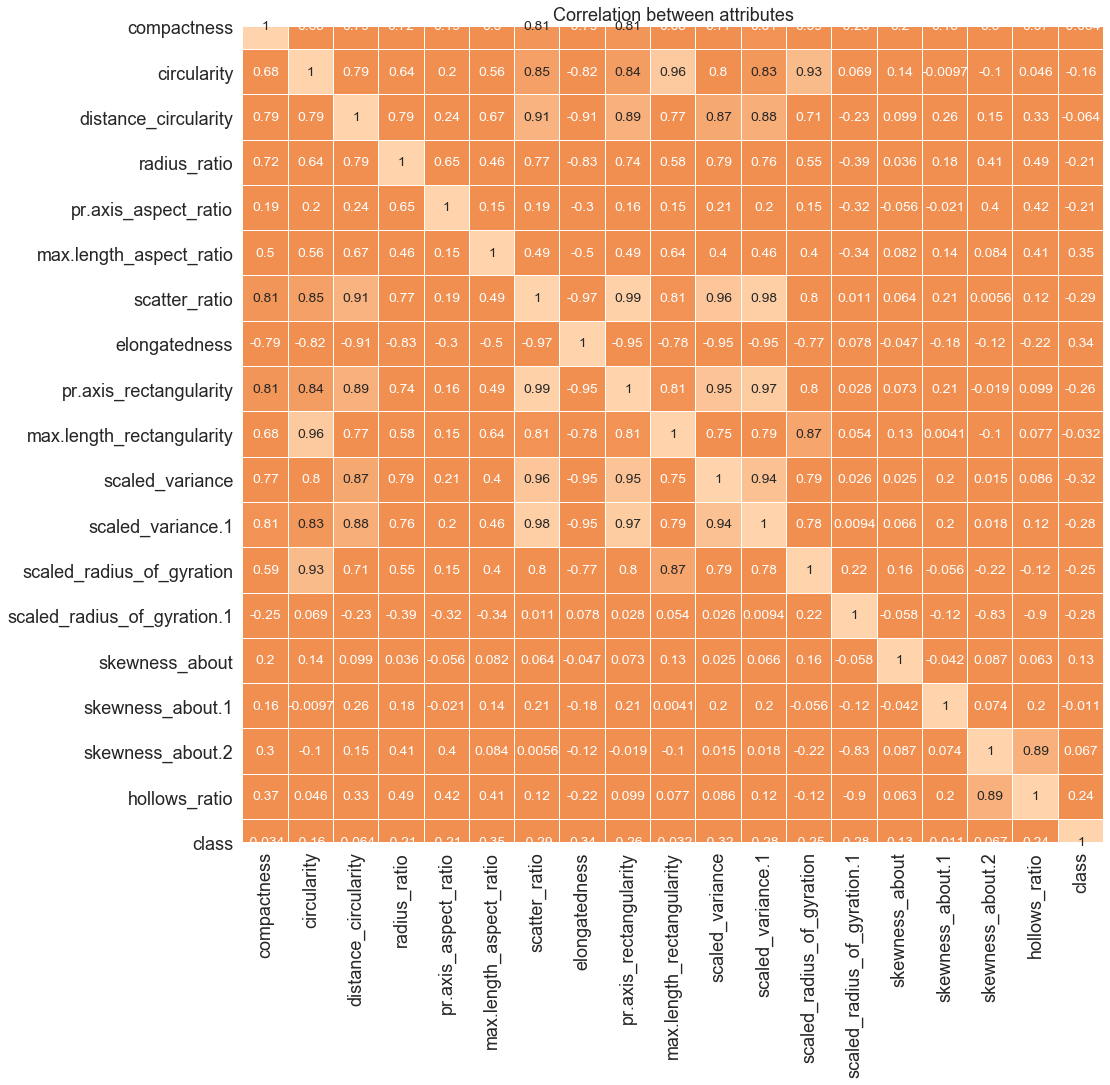

In [117]:
# correlation plot---heatmap
sns.set(font_scale=1.15)
fig,ax=plt.subplots(figsize=(18,15))
sns.heatmap(cor,vmin=0.8, annot=True,linewidths=0.01,center=0,linecolor="white",cbar=False,square=True)
plt.title('Correlation between attributes',fontsize=18)
ax.tick_params(labelsize=18)

- It shows that there are some attributes which are highly correlated as there corelation value is very high.
- For example: compactness is highly correlated in a positive way with scatter_ratio, pr.axis_rectangularity, scaled_variance1, distance_circularity, scaled_variance, radius_ratio. compactness is highly correlated in a negative way with elongatedness.

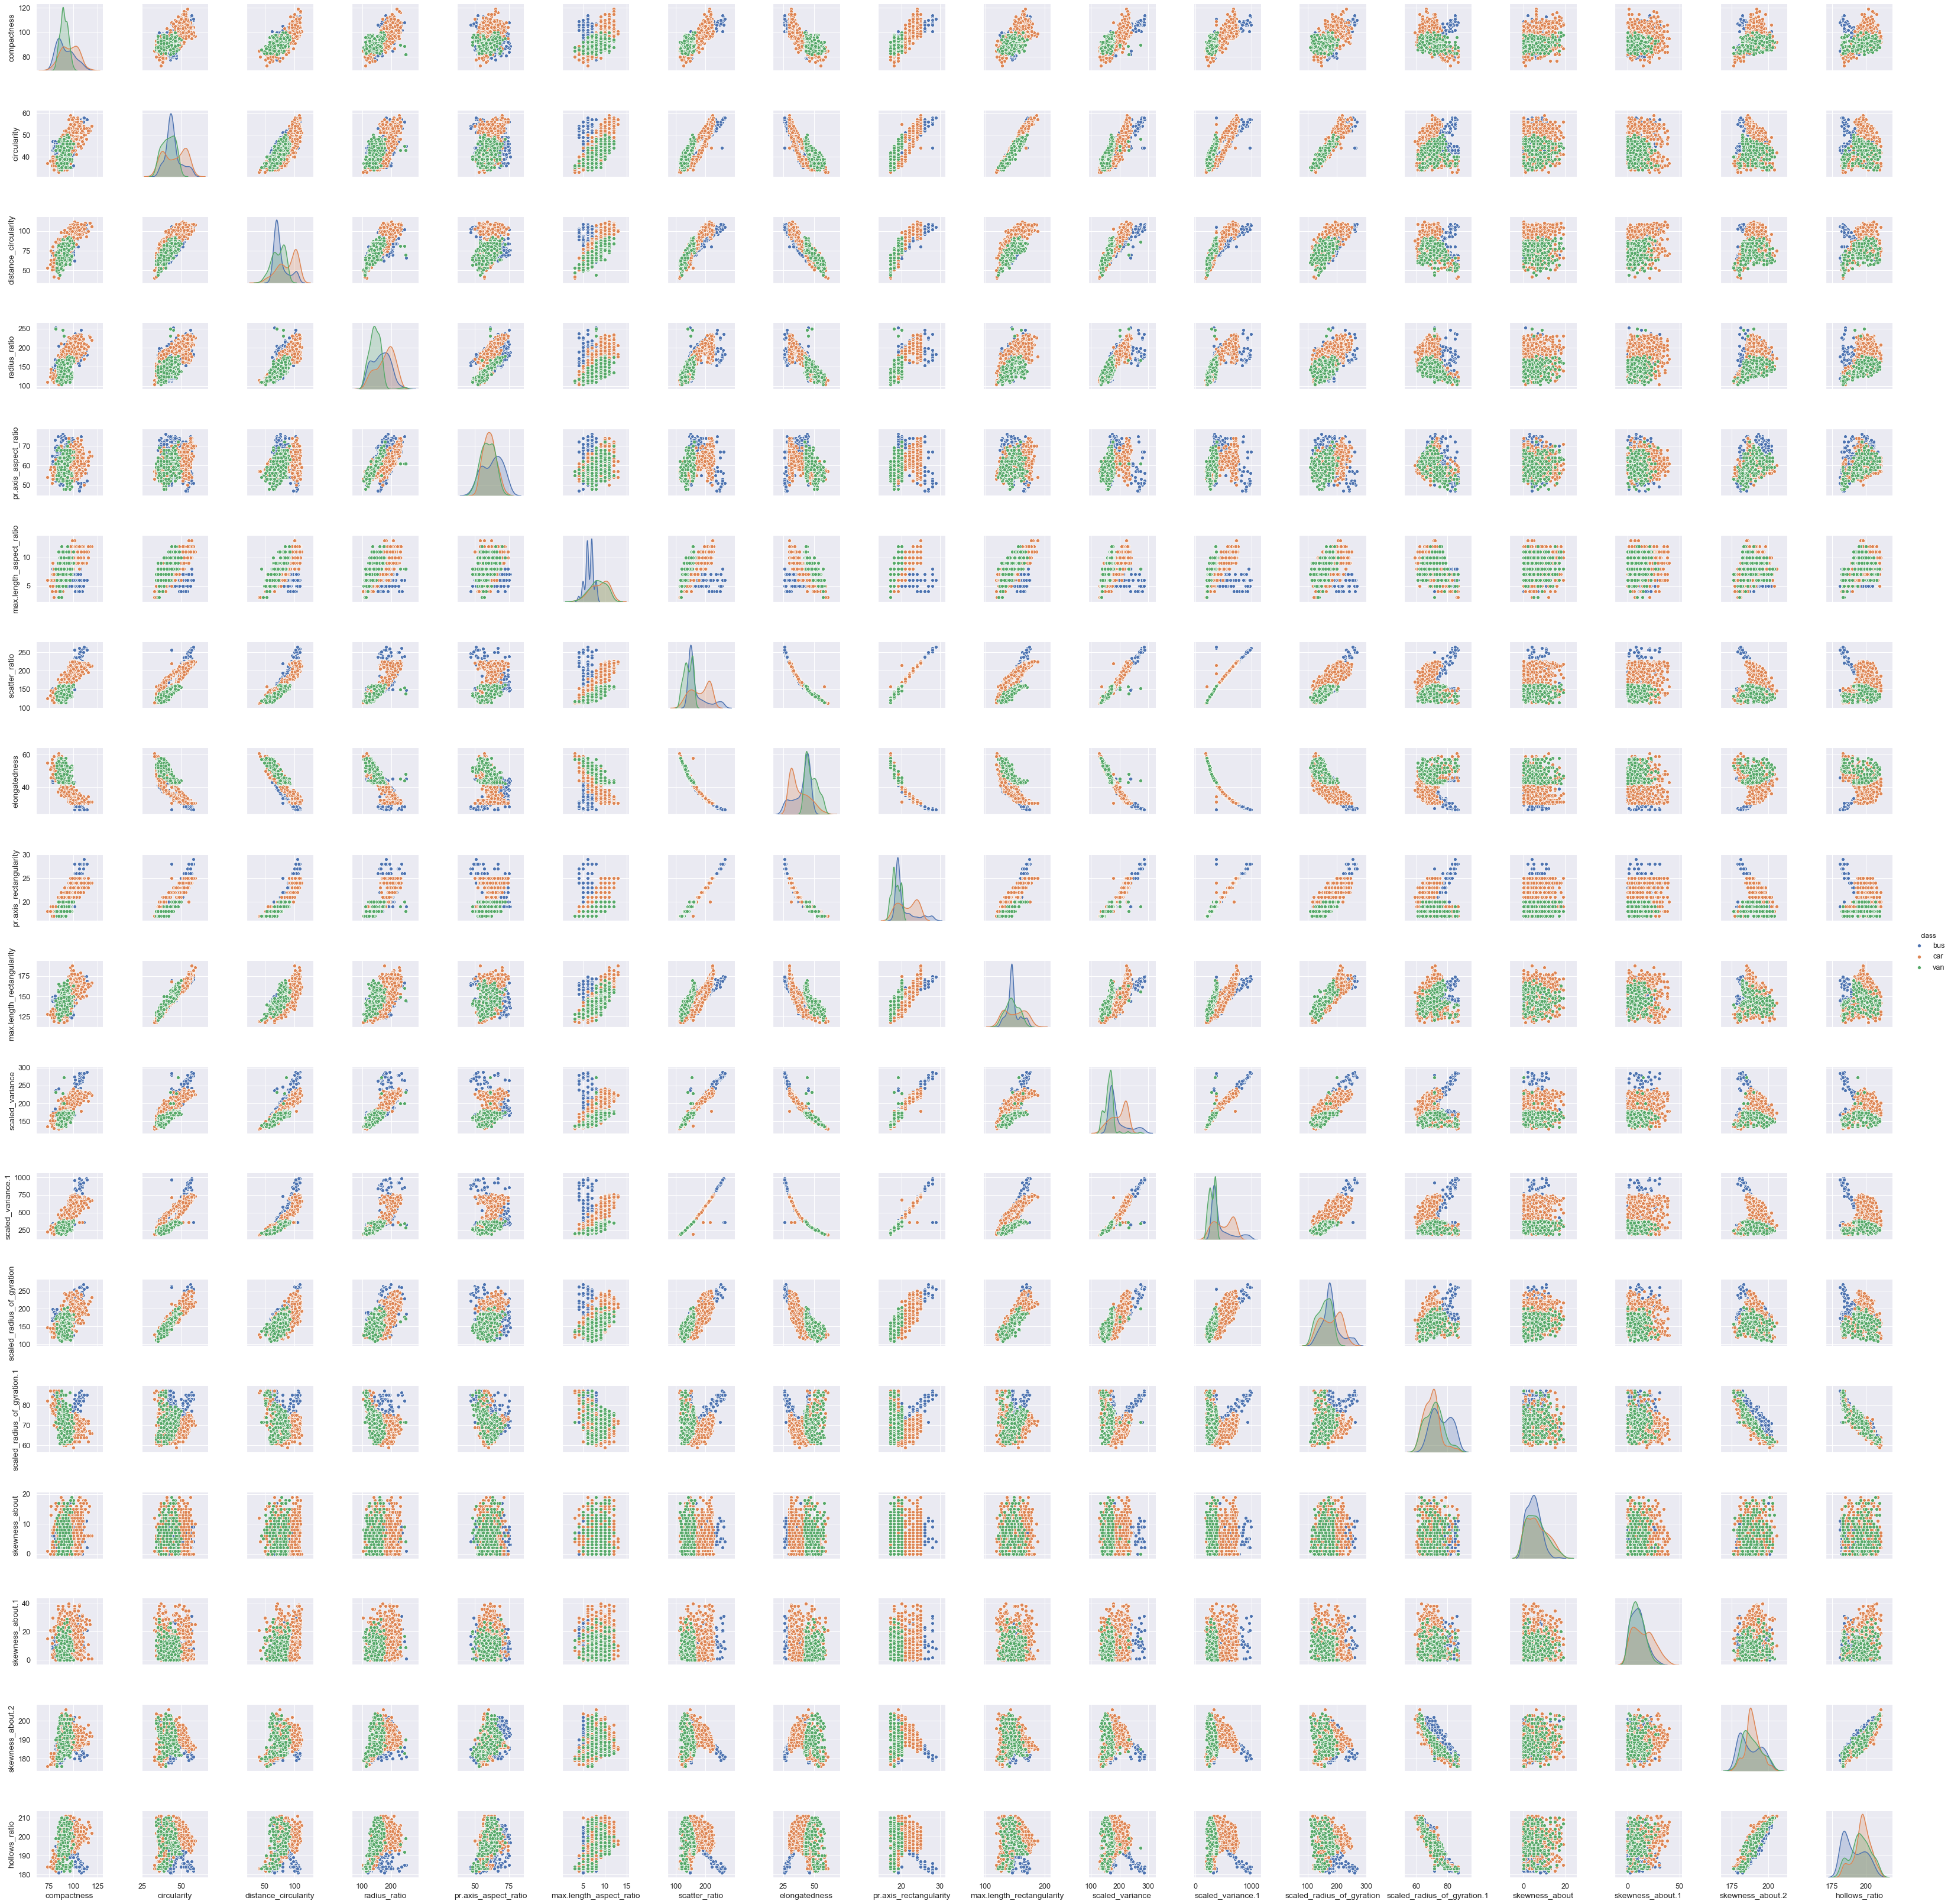

In [27]:
#pair panel
sns.pairplot(df,hue='class')

- It is also showing the same information as correlation matrix.
- compactness has positive linear relationship with circularity, distance_circularity, radius_ratio, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance1, scaled_variance. compactness has negative linear relationship with elongatedness.
- circularity has positive linear relationship with distance_circularity, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration. circularity has negative linear relationship with elongatedness.
- distance_circularity has positive linear relationship with radius_ratio, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration. distance_circularity has negative linear relationship with elongatedness.
- radius_ratio has positive linear relationship with pr.axis_aspect_ratio, scatter_ratio, scaled_variance, scaled_variance1, scaled_radius_of_gyration. radius_ratio has negative linear relationship with elongatedness.

## 5. Without applying Dimensionality Reduction

### Splitting the data into independent and dependent attributes

In [141]:
#independent and dependent variables
X=df.iloc[:,0:18]
y = df.iloc[:,18]

### Splitting the data

In [142]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [143]:
# Verifying the split of the data

print("{}% data is in training set".format((len(X_train)/len(df)) * 100))
print("{}% data is in test set".format((len(X_test)/len(df)) * 100))

69.97635933806147% data is in training set
30.023640661938533% data is in test set


## Model Building: Support Vector Machine

### Support Vector Classifier

In [144]:
from sklearn import svm
#clf = SVC()
clf = svm.SVC()
clf.fit(X_train, y_train)
SVC()

#prediction = clf.predict(X_test)

C:\Users\eyacdel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [145]:
prediction = clf.predict(X_test)
#prediction

In [146]:
# check the accuracy on the training data
print('Accuracy on Training data: ',clf.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', clf.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  1.0
Accuracy on Testing data:  0.4921259842519685
Recall value:  0.3333333333333333
Precision value:  0.16404199475065617
Confusion Matrix:
 [[  0   0   0]
 [ 71 125  58]
 [  0   0   0]]
Classification Report:
               precision    recall  f1-score   support

         bus       0.00      0.00      0.00         0
         car       1.00      0.49      0.66       254
         van       0.00      0.00      0.00         0

    accuracy                           0.49       254
   macro avg       0.33      0.16      0.22       254
weighted avg       1.00      0.49      0.66       254



C:\Users\eyacdel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\eyacdel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [147]:
#Store the accuracy results for each kernel in a dataframe for final comparison
resultsDf=pd.DataFrame({'Model':['SVM'],'Accuracy': clf.score(X_test , y_test)},index={'1'})
resultsDf=resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1   SVM  0.492126

- So without applying PCA, we have achieved an accuracy of around 49% via Support Vector Machine

#### Perform K-fold cross-validation and get the cross-validation score of the model

In [148]:
from sklearn.model_selection import cross_val_score
model = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(model, X_test, y_test, cv=5)
print(scores)
print(np.mean(scores))



[0.86538462 0.90196078 0.8627451  0.94       0.94      ]
0.9020180995475112


In [149]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['SVM k fold'], 'Accuracy': np.mean(scores)},index={'5'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1         SVM  0.492126
5  SVM k fold  0.902018

## 6. Applying Dimensionality Reduction using PCA

### Scaling

In [150]:
# Scaling the independent attributes using zscore
X_z=X.apply(zscore)

### Covariance

In [151]:
# Calculating the covariance between attributes after scaling
cov_matrix = np.cov(X_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.1038547

### Eigenvalues and Eigenvectors

In [152]:
#Finding eigenvalues amd eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01 -1.19922479e-01  7.83843562e-02
   6.95178336e-02 -1.44875476e-01 -4.51862331e-01 -5.66136785e-01
  -4.84418105e-01 -2.60076393e-01  4.65342885e-02 -1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01 -2.48205467e-02  1.87337408e-01
  -8.50649539e-02  3.02731148e-01  2.49103387e-01 -1.79851809e-01
  -1.41569001e-02  9.80779086e-02  3.01323693e-03  2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02 -5.60143254e-02 -7.12008427e-02
   4.06645651e-02  1.38405773e-01 -7.40350569e-02  4.34748988e-01
  -1.67572478e-01 -2.05031597e-01  7.06489498e-01 -3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01  2.75074211e-01 -4.26053415e-02
  -4.61473714e-02 -

- Eigenvectors are the new dimensions of the new mathematical space.
- Eigenvalues are the information content of each one of these eigenvectors or we can say it is the spread of these eigenvectors.

In [153]:
# Make a set of (eigenvalue, eigenvector) pairs
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:]

[(9.404602609088707,
  array([ 0.27528369,  0.29325847,  0.30460913,  0.26760688,  0.08050399,
          0.09727569,  0.31709275, -0.31413315,  0.31395906,  0.2828309 ,
          0.30928036,  0.31378846,  0.27204749, -0.02081377,  0.04145551,
          0.05822502,  0.03027951,  0.07414539])),
 (3.014922058524637,
  array([ 0.12695376, -0.12557673,  0.07295164,  0.18963438,  0.12217486,
         -0.01074829, -0.04811814, -0.01274985, -0.05993525, -0.11622053,
         -0.06228062, -0.05378436, -0.20923317, -0.48852515,  0.05508997,
          0.12408509,  0.54091477,  0.54035426])),
 (1.903525021838969,
  array([-0.11992248, -0.02482055, -0.05601433,  0.27507421,  0.64201297,
          0.5918013 , -0.09762831,  0.05764844, -0.10951242, -0.0170642 ,
          0.05632398, -0.10884073, -0.03146365,  0.28627701, -0.11567935,
         -0.07528289,  0.00873592,  0.03952427])),
 (1.1799374684450192,
  array([ 0.07838436,  0.18733741, -0.07120084, -0.04260534,  0.03272571,
          0.03141473, 

In [154]:
# print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigenvalues)

Eigenvalues in descending order: 
[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.96445743e-03 1.00257898e-02 2.74120657e-02
 1.79166314e-02 2.05792871e-02]


### Finding variance and cummulative variance by each eigenvector

Cumulative Variance Explained [ 52.18603365  68.9158021   79.47844095  86.02590063  91.11576952
  94.11218252  96.10354875  97.33504945  98.22626473  98.73597943
  99.10498391  99.36357011  99.5621946   99.71430385  99.82849808
  99.92791726  99.98355026 100.        ]


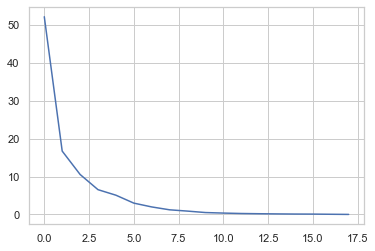

In [155]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
plt.plot(var_exp)

- We can observe that their is steep drop in variance explained with increase in number the number of Principal Components.
- Also, top 10 principal components contribute 98.5% variance (information). So, we can proceed further with 10 components.

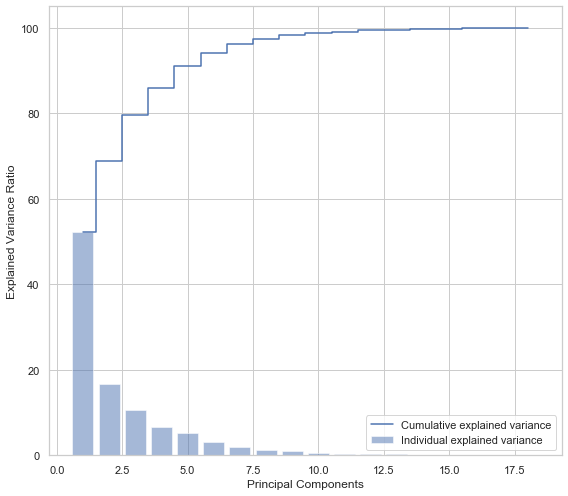

In [156]:
# Ploting 
plt.figure(figsize=(8 , 7))
plt.bar(range(1, eigenvalues.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

- Here also we can visualize and eliminiate last 7 principal components because almost 98.5% of the data is captured by 10 principal components.

In [157]:
# Reducing from 17 to 10 dimension space
pca = PCA(n_components=10)
data_reduced = pca.fit_transform(X_z)
data_reduced.transpose()

array([[ 3.34162030e-01, -1.59171085e+00,  3.76932418e+00, ...,
         4.80917387e+00, -3.29409242e+00, -4.76505347e+00],
       [-2.19026358e-01, -4.20602982e-01,  1.95282752e-01, ...,
        -1.24931049e-03, -1.00827615e+00,  3.34899728e-01],
       [ 1.00158417e+00, -3.69033854e-01,  8.78587404e-02, ...,
         5.32333105e-01, -3.57003198e-01, -5.68136078e-01],
       ...,
       [-3.81106357e-01,  2.47058909e-01,  4.82771767e-01, ...,
         1.10477865e-01,  3.20621635e-01, -2.48034955e-01],
       [-8.66309530e-01,  1.47249715e-01, -3.10832555e-01, ...,
        -6.52536352e-01, -2.01263247e-01, -4.29903644e-01],
       [ 9.15114442e-02, -9.37944293e-02, -4.67615341e-01, ...,
         5.56591558e-01, -8.74536682e-01, -2.99232676e-01]])

In [158]:
pca.components_

array([[ 2.75283688e-01,  2.93258469e-01,  3.04609128e-01,
         2.67606877e-01,  8.05039890e-02,  9.72756855e-02,
         3.17092750e-01, -3.14133155e-01,  3.13959064e-01,
         2.82830900e-01,  3.09280359e-01,  3.13788457e-01,
         2.72047492e-01, -2.08137692e-02,  4.14555082e-02,
         5.82250207e-02,  3.02795063e-02,  7.41453913e-02],
       [-1.26953763e-01,  1.25576727e-01, -7.29516436e-02,
        -1.89634378e-01, -1.22174860e-01,  1.07482875e-02,
         4.81181371e-02,  1.27498515e-02,  5.99352482e-02,
         1.16220532e-01,  6.22806229e-02,  5.37843596e-02,
         2.09233172e-01,  4.88525148e-01, -5.50899716e-02,
        -1.24085090e-01, -5.40914775e-01, -5.40354258e-01],
       [-1.19922479e-01, -2.48205467e-02, -5.60143254e-02,
         2.75074211e-01,  6.42012966e-01,  5.91801304e-01,
        -9.76283108e-02,  5.76484384e-02, -1.09512416e-01,
        -1.70641987e-02,  5.63239801e-02, -1.08840729e-01,
        -3.14636493e-02,  2.86277015e-01, -1.15679354e

In [159]:
X_comp = pd.DataFrame(pca.components_,columns=list(X_z))
X_comp.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.275284     0.293258              0.304609      0.267607   
1    -0.126954     0.125577             -0.072952     -0.189634   
2    -0.119922    -0.024821             -0.056014      0.275074   
3     0.078384     0.187337             -0.071201     -0.042605   
4     0.069518    -0.085065              0.040665     -0.046147   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.080504                 0.097276       0.317093   
1             -0.122175                 0.010748       0.048118   
2              0.642013                 0.591801      -0.097628   
3              0.032726                 0.031415      -0.095749   
4             -0.040549                 0.213433      -0.015485   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -0.314133                0.313959                   0.282831   
1       0.012750                0.059935                   0.116221   
2       0.057648               -0.109512                  -0.017064   
3       0.082290               -0.092458                   0.188006   
4       0.076852                0.002176                  -0.060637   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.309280           0.313788                   0.272047   
1         0.062281           0.053784                   0.209233   
2         0.056324          -0.108841                  -0.031464   
3        -0.119844          -0.091745                   0.200095   
4        -0.000456          -0.019555                  -0.061599   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.020814        0.041456          0.058225   
1                     0.488525       -0.055090         -0.124085   
2                     0.286277       -0.115679         -0.075283   
3                    -0.065505        0.604794         -0.666114   
4                     0.145530        0.729190          0.599196   

   skewness_about.2  hollows_ratio  
0          0.030280       0.074145  
1         -0.540915      -0.540354  
2          0.008736       0.039524  
3          0.105526       0.047489  
4         -0.100602      -0.029861

In [160]:
# P_reduce represents reduced mathematical space.
# Reducing from 17 to 10 dimension space
P_reduce = np.array(eigenvectors[0:10])   
# projecting original data into principal component dimensions
X_std_10D = np.dot(X_z,P_reduce.T)   
# converting array to dataframe for pairplot
Proj_data_df = pd.DataFrame(X_std_10D)

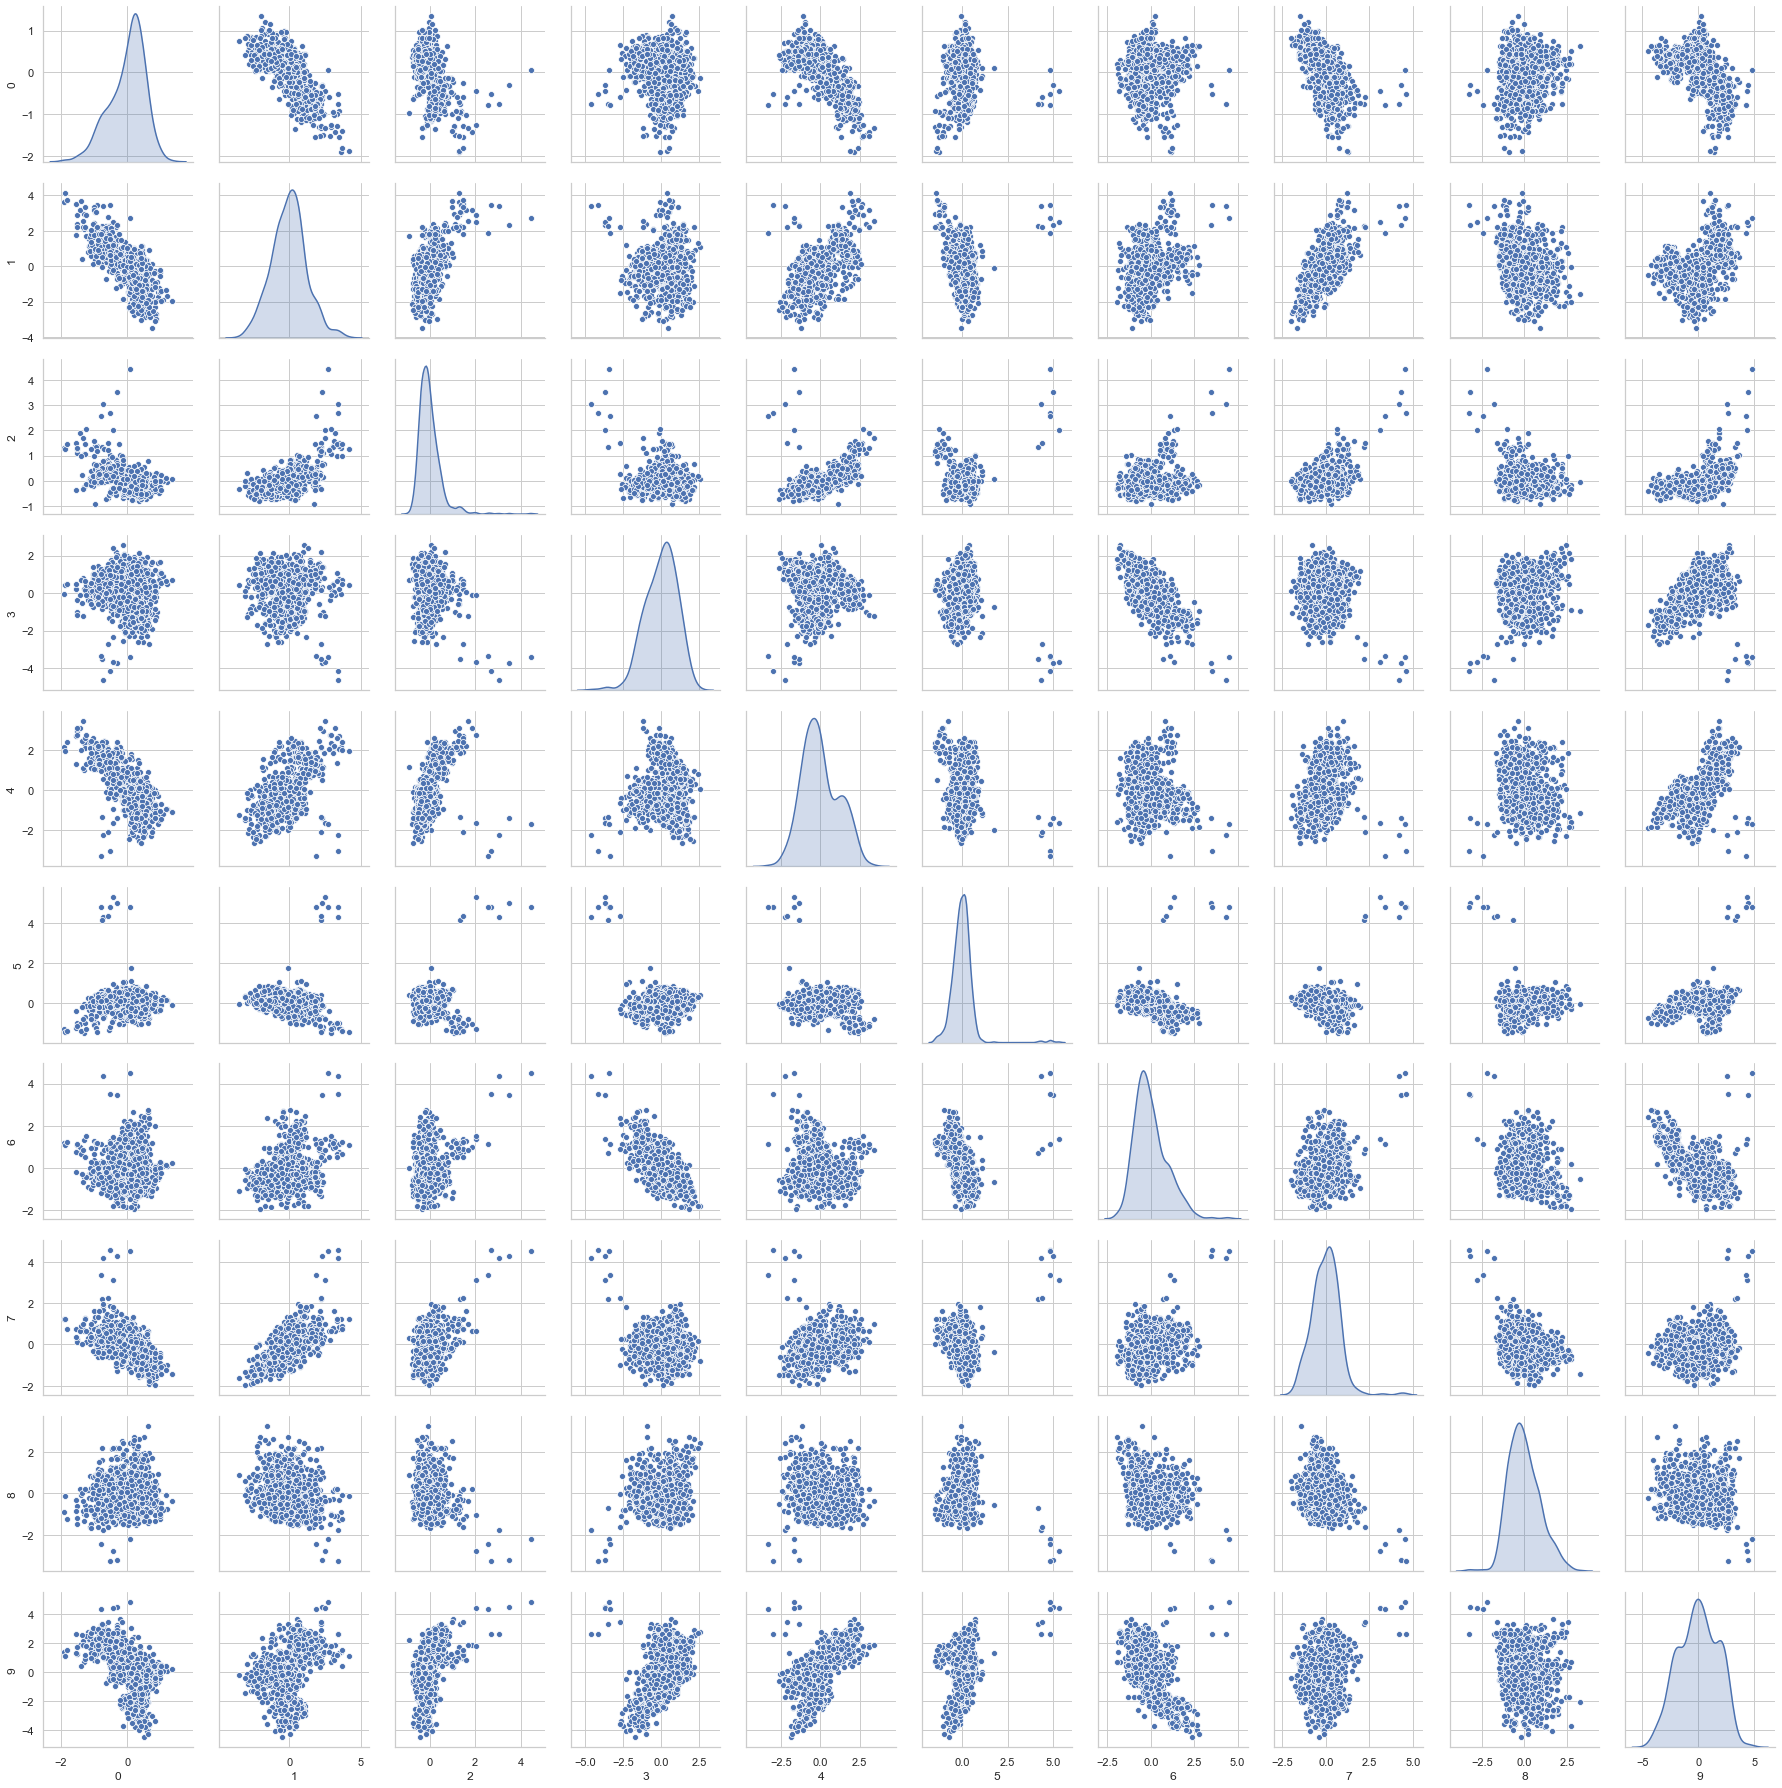

In [161]:
#Let us check it visually
sns.pairplot(Proj_data_df, diag_kind='kde')

- Now, there are almost no correlation between independent attributes but there are some attributes which shows some correlation. The reason behind this is that some attributes in data are less correlated but we still taken that for dimentionality reduction. The solution may be we can remove columns which are less correlated then apply PCA.

## Splitting the data

In [163]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(Proj_data_df,y, test_size = 0.3, random_state = 10)

In [166]:
# Verifying the split of the data

print("{}% data is in training set".format((len(X_train)/len(Proj_data_df)) * 100))
print("{}% data is in test set".format((len(X_test)/len(Proj_data_df)) * 100))

69.97635933806147% data is in training set
30.023640661938533% data is in test set


## Model Building: Using PCA and Support Vector Machine


### Support Vector Classifier

In [167]:
clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

C:\Users\eyacdel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [168]:
# check the accuracy on the training data
print('Accuracy on Training data: ',clf.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', clf.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.9425675675675675
Accuracy on Testing data:  0.9291338582677166
Recall value:  0.9336700663752632
Precision value:  0.9172108494142392
Confusion Matrix:
 [[ 65   4   1]
 [  2 115   1]
 [  4   6  56]]
Classification Report:
               precision    recall  f1-score   support

         bus       0.92      0.93      0.92        70
         car       0.92      0.97      0.95       118
         van       0.97      0.85      0.90        66

    accuracy                           0.93       254
   macro avg       0.93      0.92      0.92       254
weighted avg       0.93      0.93      0.93       254



- This model is performing well using PCA. Accuracy rate is more than 92%.

In [170]:
#Store the accuracy results for each kernel in a dataframe for final comparison
resultsDf=pd.DataFrame({'Model':['SVM'],'Accuracy': clf.score(X_test , y_test)},index={'1'})
resultsDf=resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1   SVM  0.929134

#### Using PCS perform K-fold cross-validation and get the cross-validation score of the model

In [171]:
#Build the model with the best hyper parameters
#Perform K-fold cross-validation and get the cross-validation score of the model
model = SVC(C=0.5, kernel="linear")
scores = cross_val_score(model, Proj_data_df, y, cv=10)
print(scores)
print(np.mean(scores))

[0.84705882 0.83529412 0.88235294 0.89411765 0.88235294 0.83529412
 0.89411765 0.83529412 0.80952381 0.87804878]
0.8593454942952791


In [172]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['SVM k fold'], 'Accuracy': np.mean(scores)},index={'5'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1         SVM  0.929134
5  SVM k fold  0.859345

#### Conclusion:
Without PCA, we can see that cross-validation score (SVM K-fold) is far greater than compare to accuracy score(of SVM), but using PCA, accuracy score is better than the cross-validation score of SVM model.

So, we can use SVM using PCA model to predict the silhouette as one of three types of vehicle.

